## Import Libraries

In [1]:

pip install tensorflow

  Obtaining dependency information for keras<2.14,>=2.13.1 from https://files.pythonhosted.org/packages/2e/f3/19da7511b45e80216cbbd9467137b2d28919c58ba1ccb971435cb631e470/keras-2.13.1-py3-none-any.whl.metadata
  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.13.1 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install pydot


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install scikeras
!pip install keras
!pip install matplotlib
!pip install seaborn
!pip install librosa
!pip install os
!pip install sys
!pip install io
!pip install pickle

  Obtaining dependency information for keras>=3.2.0 from https://files.pythonhosted.org/packages/8d/44/c604ecc5c9993b6574a681f2f505e980725871a89cfd9e48597b12ccb506/keras-3.3.3-py3-none-any.whl.metadata
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 3.3.3 which is incompatible.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: 

In [4]:
#Import required libraries
import os

import numpy as np
import pandas as pd

import librosa
import librosa.display

import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram

import tensorflow as tf
import glob
import IPython.display as ipd
import sys

import keras
from keras import layers
from keras.utils import plot_model
from keras.layers import Activation, Dense, Dropout, Conv2D, Conv1D, Flatten, MaxPooling2D, MaxPooling1D, BatchNormalization
from keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from keras.models import model_from_json
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

import random

import pickle
import seaborn as sns
import io
# from google.colab import files

#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#function to parse file and extract corresponding emotion for savee dataset


def tess_data_parser(filepaths, path):
    audio_item = []
    emotion = []
    classID = []

    for i in filepaths:
        filename = os.listdir(os.path.join(path, i))  # Use os.path.join to construct the file path
        for f in filename:
            if i == 'OAF_angry' or i == 'YAF_angry':
                emotion.append('angry')
                classID.append(1)
            elif i == 'OAF_disgust' or i == 'YAF_disgust':
                emotion.append('disgust')
                classID.append(2)
            elif i == 'OAF_Fear' or i == 'YAF_fear':
                emotion.append('fear')
                classID.append(3)
            elif i == 'OAF_happy' or i == 'YAF_happy':
                emotion.append('happy')
                classID.append(4)
            elif i == 'OAF_neutral' or i == 'YAF_neutral':
                emotion.append('neutral')
                classID.append(5)
            elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
                emotion.append('surprise')
                classID.append(6)
            elif i == 'OAF_Sad' or i == 'YAF_sad':
                emotion.append('sad')
                classID.append(7)
            else:
                continue
            audio_item.append(os.path.join(path, i, f))  # Construct the full file path

    tess_df = pd.DataFrame(emotion, columns=['emotion'])
    tess_df['classID'] = classID
    tess_df = pd.concat([tess_df, pd.DataFrame(audio_item, columns=['audio_file'])], axis=1)

    return tess_df

def ravdess_data_parser(filepaths, path):
    audio_item = []
    emotion = []
    classID = []
    
    # Mapping from the emotion identifier to the emotion label and class ID
    emotion_map = {
        '01': ('neutral', 5),
        '03': ('happy', 4),
        '04': ('sad', 7),
        '05': ('angry', 1),
        '06': ('fear', 3),
        '07': ('disgust', 2),
        '08': ('surprise', 6)
    }
    
    for i in filepaths:
        filename = os.listdir(os.path.join(path, i))  # Use os.path.join to construct the file path
        for f in filename:
            parts = f.split('-')
            if len(parts) != 7:
                continue  
            
            emotion_id = parts[2]
            if emotion_id == '02':  # Skip 'calm' emotion
                continue
            
            emotion_label, class_id = emotion_map.get(emotion_id, (None, None))
            if emotion_label is None:
                continue  
            
            emotion.append(emotion_label)
            classID.append(class_id)
            audio_item.append(os.path.join(path, i, f))  
    
    ravdess_df = pd.DataFrame(emotion, columns=['emotion'])
    ravdess_df['classID'] = classID
    ravdess_df = pd.concat([ravdess_df, pd.DataFrame(audio_item, columns=['audio_file'])], axis=1)
    
    return ravdess_df


#function to load raw data
def load_mel_all(df):

    mel_data = []
    targets = []

    for row in df.itertuples():
        y,sr = librosa.load(row.audio_file)
        mel = librosa.feature.melspectrogram(y=y, sr=sampling_rate, n_mels=128)
        mel_data.append(mel)
        targets.append(row.emotion)

    return [mel_data, targets]


def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# function to get unique values
def unique(list1):
    unique_list = []

    for x in list1:

        if x not in unique_list:
            unique_list.append(x)
    return unique_list

#function to produce binary representations for each class
def iterator(z):
    main = []
    for i in unique(z):
        d = []
        j = 0
        while j < len(z):
            if i == z[j]:
                d.append(i)
            else:
                d.append("other")
            j += 1
        main.append(d)

    return main


def prepare_data(X, y, lb):


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)


    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    X_val = np.array(X_val)
    y_val = np.array(y_val)


    X_train = np.array([x.reshape((128,87,1)) for x in X_train])
    X_val = np.array([x.reshape((128,87,1)) for x in X_val])
    X_test = np.array([x.reshape((128,87,1)) for x in X_test])

    
    y_train = keras.utils.to_categorical(lb.fit_transform(y_train))
    y_test = keras.utils.to_categorical(lb.fit_transform(y_test))
    y_val = keras.utils.to_categorical(lb.fit_transform(y_val))


    return X_train, y_train, X_test, y_test, X_val, y_val


def plot_model(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc)+ 1)
    print(epochs)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


def fit_model(model, X_train, y_train,X_val, y_val, epochs):

    callbacks_list = [
                    keras.callbacks.EarlyStopping(
                        monitor = 'acc',
                        patience = 1,
                        mode = 'max'
                    )]

    history = model.fit(x=X_train,
            y = y_train,
            epochs=epochs,
            batch_size=50,
            callbacks = callbacks_list,
            validation_data = (X_val, y_val))

    score = model.evaluate(x = X_val,
                        y = y_val)

    print('Test loss: ', score[0])
    print('Test accuracy: ', score[1])

    return history, score


import os

def save_model(model, model_name, filename):
    # Save model and weights
    model_name = model_name
    save_dir = os.path.join(os.getcwd(), 'saved_models')

    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)

    model_path = os.path.join(save_dir, model_name + '.h5')
    model.save(model_path)
    print('Saving model and weights at %s ' % model_path)

    # Save the model to disk
    model_json = model.to_json()
    with open(filename, "w") as json_file:
        json_file.write(model_json)

# def save_model(model, model_name, filename):
#     # Save model and weights
#     model_name = model_name
#     save_dir = os.path.join(os.getcwd(), 'saved_models')

#     if not os.path.isdir(save_dir):
#         os.makedirs(save_dir)

#     model_path = os.path.join(save_dir, model_name + '.h5')  # Add '.h5' extension
#     model.save(model_path)
#     print('Saving model and weights at %s ' % model_path)

#     # Save the model architecture to disk
#     model_json = model.to_json()
#     with open(filename, "w") as json_file:
#         json_file.write(model_json)


# def load_model(filename, model_name):
#     # loading json and model architecture
#     json_file = open(filename, 'r')
#     loaded_model_json = json_file.read()
#     json_file.close()
#     loaded_model = model_from_json(loaded_model_json)

#     # load weights into new model
#     loaded_model.load_weights("saved_models/"+ str(model_name))
#     print("Loaded model from disk")

#     return loaded_model
def load_model(filename, model_name):
    # loading json and model architecture
    json_file = open(filename, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)

    # load weights into new model
    loaded_model.load_weights("saved_models/" + model_name + '.keras')  # Use '.h5' extension
    print("Loaded model from disk")
    return loaded_model


def OneD_CNN(input_shape):

    model = Sequential()

    model.add(Conv1D(256, 8, padding='same', activation="relu",input_shape=input_shape))

    model.add(Conv1D(256, 8, padding='same', activation="relu"))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(8)))

    model.add(Conv1D(128, 8, padding='same', activation="relu"))

    model.add(Conv1D(128, 8, padding='same', activation="relu"))

    model.add(Conv1D(128, 8, padding='same', activation="relu"))

    model.add(Conv1D(128, 8, padding='same', activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(8)))

    model.add(Conv1D(64, 8, padding='same', activation="relu"))

    model.add(Conv1D(64, 8, padding='same', activation="relu"))

    #model.add(Flatten())

    model.add(layers.LSTM(256))

    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.3))

    model.add(Dense(7))
    model.add(Activation('softmax'))


    model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics = ['accuracy'])

    return model



## Dataset

In [6]:

tess_data_path = r"F:\SpeechEmotionRecognition\TESS Toronto emotional speech set data"
tess_audio = os.listdir(tess_data_path)
tess_audio.sort()
tess_audio

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'TESS Toronto emotional speech set data',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [7]:
ravdess_data_path = r"F:\SpeechEmotionRecognition\dataset\RAVDESS_dataset"
ravdess_audio = os.listdir(ravdess_data_path)
ravdess_audio.sort()
ravdess_audio

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [8]:
tess_df = tess_data_parser(tess_audio, tess_data_path)
ravdess_df = ravdess_data_parser(ravdess_audio, ravdess_data_path)
combined_df = pd.concat([tess_df, ravdess_df], ignore_index=True)

<Figure size 1500x500 with 0 Axes>

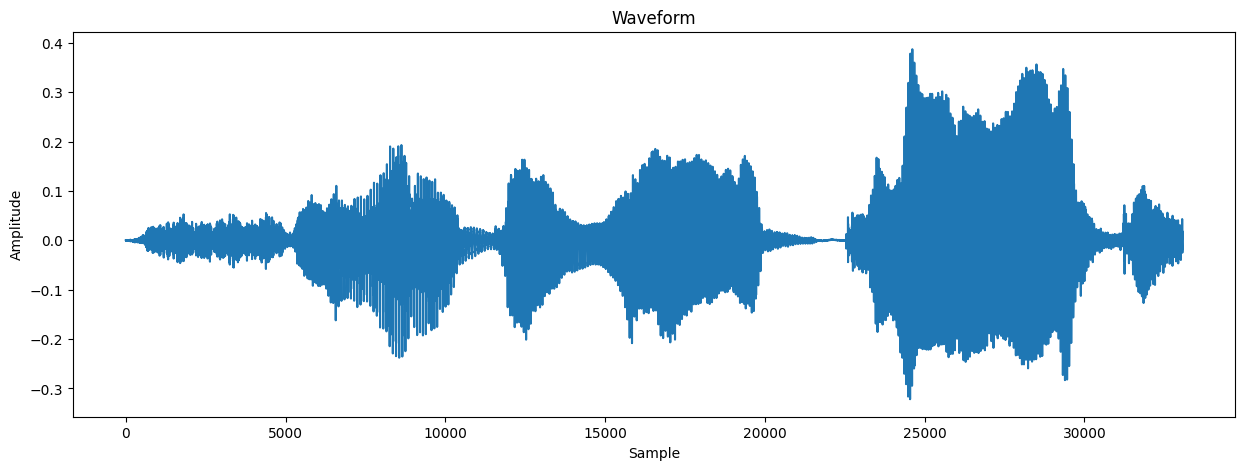

In [9]:
#Explore data TESS

# play a fearful track 
# fname = tess_data_path + 'YAF_fear/YAF_dog_fear.wav' 
fname = os.path.join(tess_data_path, 'YAF_fear', 'YAF_dog_fear.wav')

data, sampling_rate = librosa.load(fname, duration=1.5)
plt.figure(figsize=(15, 5))
# librosa.display.waveplot(data, sr=sampling_rate)
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

#play the audio 
ipd.Audio(fname)

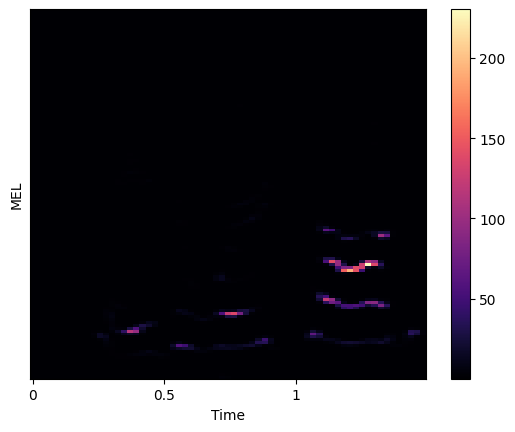

In [10]:

mel = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128)

librosa.display.specshow(mel, x_axis='time')
plt.ylabel('MEL')
plt.colorbar()
plt.show()

### Model training

**Load data and take mean of the time axis to reduce dimensions**

In [11]:
tess_all = load_mel_all(combined_df)

In [12]:
X = tess_all[0]
y = tess_all[1]

In [13]:
f = [np.mean(c, axis=0) for c in X]

In [14]:
s = pd.DataFrame(f)
s

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.000208,0.000353,0.000249,2.586271e-04,5.047327e-04,7.800792e-04,9.616225e-04,1.516106e-03,2.000814e-03,2.083288e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000078,0.000146,0.000141,8.037292e-04,1.549025e-03,2.332961e-03,4.066971e-03,5.406343e-03,6.060374e-03,6.161802e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000022,0.000128,0.000183,3.226881e-04,9.328296e-04,1.853263e-03,3.174986e-03,4.437734e-03,5.177184e-03,4.975202e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000188,0.000331,0.000107,2.783810e-04,7.278688e-04,1.114704e-03,2.013223e-03,2.877515e-03,3.785030e-03,4.667748e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000115,0.000097,0.000123,3.279960e-04,9.225940e-05,1.193739e-04,3.060341e-04,6.650941e-04,1.564744e-03,3.075922e-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4044,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4045,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4046,0.000000,0.000000,0.000000,6.688781e-24,4.203038e-13,5.452949e-08,1.966800e-07,4.515154e-08,1.201346e-10,9.061915e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
t = s.fillna(0)

In [16]:
t.shape

(4048, 228)

In [17]:
lb = LabelEncoder()
def prepare1D(X, y, lb):
    
    if len(X) != len(y):
        raise ValueError("X and y must have the same number of samples")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)


    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    X_val = np.array(X_val)
    y_val = np.array(y_val)

    # Reshape for CNN
    X_train = np.array([x.reshape((228, 1)) for x in X_train])
    X_val = np.array([x.reshape((228, 1)) for x in X_val])
    X_test = np.array([x.reshape((228, 1)) for x in X_test])

    # One hot encode the target
    
    lb.fit(y_train)
    y_train = keras.utils.to_categorical(lb.transform(y_train))
    y_test = keras.utils.to_categorical(lb.transform(y_test))
    y_val = keras.utils.to_categorical(lb.transform(y_val))

    return X_train, y_train, X_test, y_test, X_val, y_val



In [18]:

lb = LabelEncoder()

In [19]:
X_train, y_train, X_test, y_test, X_val, y_val =  prepare1D(t, y, lb)

In [20]:
X_train.shape

(2914, 228, 1)

In [21]:
model = OneD_CNN((228,1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 228, 256)       │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 228, 256)       │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 228, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 28, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 28, 128)        │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 28, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 28, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 28, 128)        │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 3, 64)          │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 3, 64)          │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 256)            │       328,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 7)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,677,959 (6.40 MB)

 Trainable params: 1,677,703 (6.40 MB)

 Non-trainable params: 256 (1.00 KB)

In [22]:
epochs = 15
history, score = fit_model(model,X_train, y_train,X_val, y_val,epochs)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 26s 340ms/step - accuracy: 0.2064 - loss: 1.8209 - val_accuracy: 0.3361 - val_loss: 1.6246
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 18s 309ms/step - accuracy: 0.3876 - loss: 1.5478 - val_accuracy: 0.3937 - val_loss: 1.5517
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 18s 304ms/step - accuracy: 0.4610 - loss: 1.3123 - val_accuracy: 0.5569 - val_loss: 1.1609
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 18s 302ms/step - accuracy: 0.5445 - loss: 1.1028 - val_accuracy: 0.3086 - val_loss: 1.6474
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 18s 302ms/step - accuracy: 0.6252 - loss: 0.9141 - val_accuracy: 0.6653 - val_loss: 0.8856
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 18s 305ms/step - accuracy: 0.6785 - loss: 0.8381 - val_accuracy: 0.5487 - val_loss: 1.1194
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 18s 302ms/step - accuracy: 0.7167 - loss: 0.7088 - val_accuracy: 0.6173 - val_loss: 0.9755
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 18s 305ms/step - accuracy: 0.7156 - loss: 0.7459 - val_accu

range(1, 16)


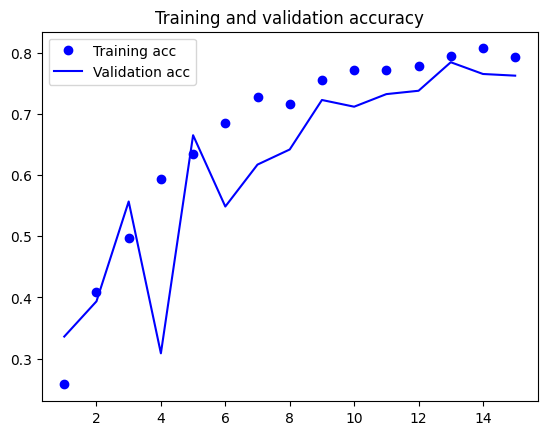

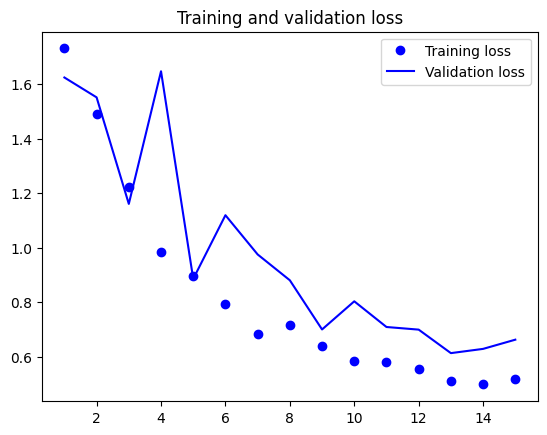

In [23]:
plot_model(history)

In [24]:
#use model to make predictions
preds = model.predict(X_test, 
                      batch_size=50, 
                      verbose=1)

preds=preds.argmax(axis=1)
preds

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


array([1, 6, 3, 1, 1, 6, 0, 0, 6, 1, 4, 3, 5, 0, 6, 6, 6, 1, 1, 3, 3, 1,
       2, 3, 1, 1, 3, 0, 6, 3, 1, 3, 5, 6, 1, 5, 6, 0, 0, 0, 2, 3, 2, 5,
       0, 2, 6, 1, 6, 2, 4, 1, 3, 3, 5, 0, 6, 3, 2, 6, 3, 0, 5, 0, 3, 1,
       1, 0, 4, 0, 0, 3, 1, 5, 6, 5, 6, 4, 1, 6, 0, 6, 2, 2, 1, 6, 6, 1,
       1, 6, 6, 1, 6, 1, 3, 5, 0, 6, 0, 3, 6, 3, 3, 0, 6, 4, 5, 5, 1, 5,
       5, 3, 3, 4, 3, 3, 6, 1, 6, 1, 1, 1, 5, 4, 5, 0, 5, 4, 6, 0, 4, 5,
       5, 3, 1, 6, 1, 1, 2, 2, 1, 1, 1, 3, 0, 2, 4, 5, 3, 6, 1, 1, 3, 3,
       2, 5, 5, 6, 5, 6, 3, 5, 5, 1, 2, 4, 0, 5, 0, 0, 5, 5, 0, 4, 5, 2,
       2, 0, 4, 6, 1, 1, 6, 6, 1, 6, 0, 3, 2, 0, 0, 6, 4, 3, 1, 5, 0, 4,
       1, 5, 6, 5, 2, 2, 5, 4, 2, 5, 3, 0, 5, 4, 3, 5, 5, 1, 6, 0, 0, 0,
       3, 5, 6, 4, 3, 1, 2, 0, 6, 5, 4, 2, 5, 2, 1, 1, 5, 5, 6, 1, 3, 5,
       0, 6, 2, 6, 4, 2, 0, 3, 2, 3, 2, 0, 3, 4, 3, 0, 1, 1, 4, 5, 2, 5,
       5, 2, 3, 6, 4, 1, 2, 1, 3, 2, 3, 1, 5, 5, 3, 1, 6, 0, 3, 1, 2, 1,
       5, 5, 6, 5, 1, 1, 6, 4, 6, 5, 3, 1, 4, 5, 6,

In [25]:

# view predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

preds

,predictedvalues
0,disgust
1,surprise
2,happy
3,disgust
4,disgust
...,...
400,angry
401,happy
402,fear
403,surprise


In [26]:
#compare predicted to actual values

actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

finaldf = actual.join(preds)
finaldf

,actualvalues,predictedvalues
0,sad,disgust
1,surprise,surprise
2,fear,happy
3,disgust,disgust
4,angry,disgust
...,...,...
400,angry,angry
401,happy,happy
402,fear,fear
403,surprise,surprise


0.7555555555555555


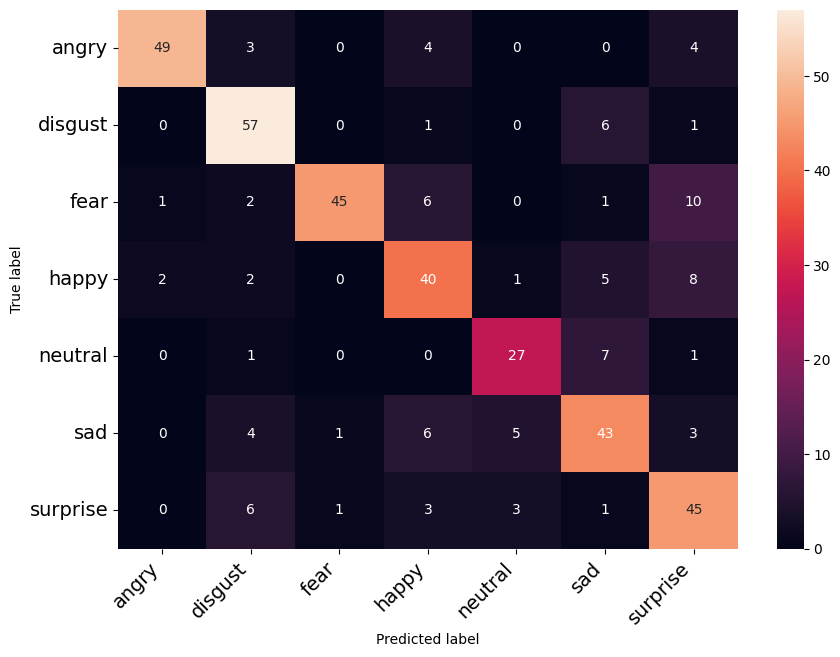

In [27]:
#view confusion matrix
classes = finaldf.actualvalues.unique()
classes.sort()    

c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [28]:
#compare predicted to actual values

actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

finaldf = actual.join(preds)
finaldf

,actualvalues,predictedvalues
0,sad,disgust
1,surprise,surprise
2,fear,happy
3,disgust,disgust
4,angry,disgust
...,...,...
400,angry,angry
401,happy,happy
402,fear,fear
403,surprise,surprise


In [29]:
# #save model
# save_model(model,'oneDcnnall.h5','oneDcnnall')

In [30]:
import pickle

In [31]:
pickle.dump(model, open('model.pkl', 'wb'))